In [1]:
"""
Loading the relevant scripts
"""


from feedforward import *
from train import *
from test import*
from dataset import*

In [2]:
"""
Training parameters

Note: n defines an interval between -n and n from which we pick the integer entries for an SL(2,Z) matrix
"""

num_epochs = 10000
stepsize=1e-4
batch_size=50
n=10
steps=1

In [3]:
"""
Initializing feed-forward NN
"""
net_params, opt_init, opt_update, get_params,net_apply=feedforward(stepsize)

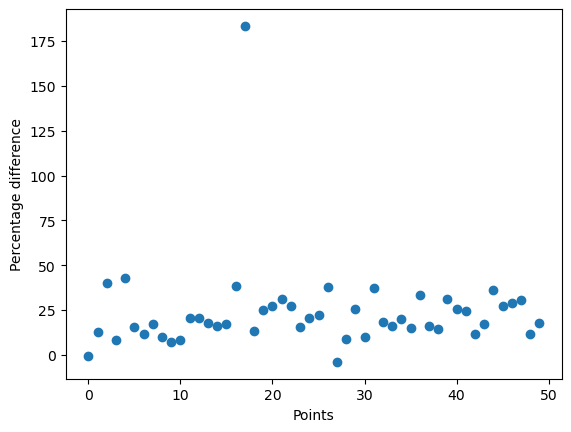

In [4]:
"""
Training. 

Returns updated parameters, as well as all the data batches that the NN was trained on.
"""
new_params,data_generator=train(batch_size,steps,num_epochs,n,net_params, opt_init, opt_update, get_params,net_apply,3)

This is a plot of the output of the NN (with the trained parameters) for the last batch of random data points in the fundamental domain. The y-axis shows the percentage difference between the output of the NN for the points and a random ${SL}(2,\mathbb{Z})$ transform of those points. We see that most of the points lie within 25%, and hence ${SL}(2,\mathbb{Z})$ invariance is being learned to an extent.

In [5]:
"""
Store trained parameters
"""
import pickle
pickle.dump( new_params , open( 'weights.pkl' , 'wb' ) )

In [6]:
"""
Import trained parameters
"""
import pickle
new_params = pickle.load( open( 'weights.pkl' , 'rb' ))

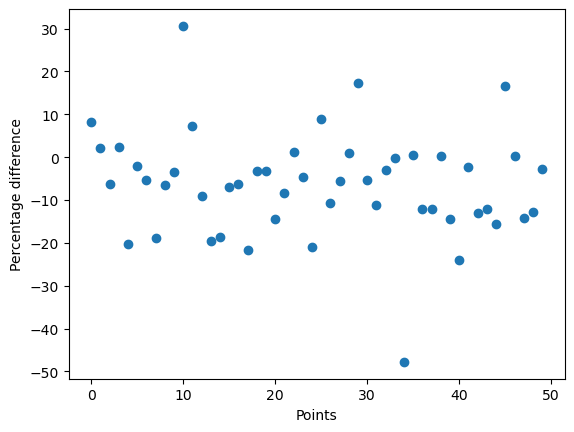

In [18]:
"""
Testing learned parameters on unknown data (with same batch size and n)
"""
test(new_params,net_apply, 50,10, 10000)

We see that most points lie within 20%, which indicates similar performance on unknown data with the same parameters.

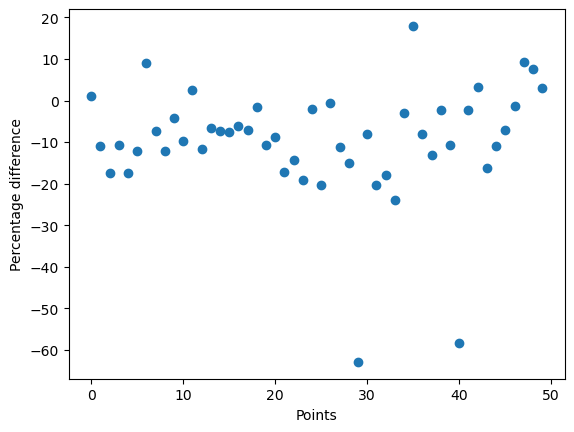

In [19]:
"""
Testing learned parameters with different n
"""
test(new_params,net_apply, 50,30, 10000)

We again see similar performace, this time with a higher value of $n$. This means that the NN is generalizing well to unseen ${SL}(2,\mathbb{Z})$ matrices.

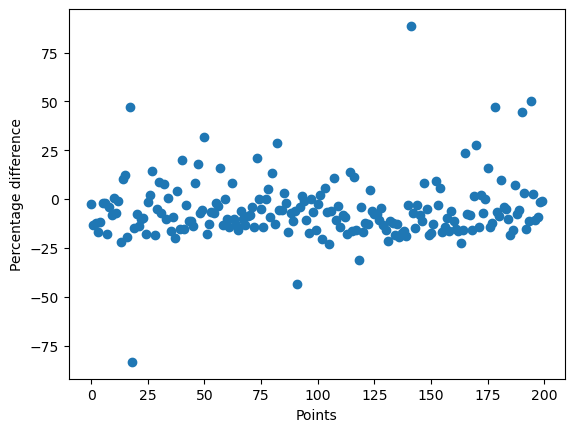

In [20]:
"""
Testing learned parameters with different n and bigger batch size
"""
test(new_params,net_apply, 200,30, 10000)

Similar performance for larger batches as well.

So far, we see that the NN is generalzing well to different ${SL}(2,\mathbb{Z})$ matrices. However, the percentage difference still needs to be improved for true ${SL}(2,\mathbb{Z})$ invariance!